In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import preprocessing

# Input df and explore

In [3]:
df = pd.read_csv(r'/Users/lichao/Documents/beifen12/我/学习/data_science/chapter_1/survey-results-public.csv')

In [4]:
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
pd.options.display.max_rows
variables = df.columns
variables

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

# U.S. Female developers Salary and Job Satisfaction by Formal Education

In [43]:
female_education_salary = pd.DataFrame(df.query("Gender == 'Female' and Country == 'United States'"). 
                                       groupby(['FormalEducation']).mean()[['Salary','JobSatisfaction']]).sort_values(by=['JobSatisfaction']).dropna()
female_education_salary

,Salary,JobSatisfaction
FormalEducation,,
Some college/university study without earning a bachelor's degree,72119.696970,7.041096
Master's degree,96578.833333,7.057803
Bachelor's degree,88469.482456,7.387309
Professional degree,82750.000000,7.833333
Doctoral degree,122047.692308,7.911765
Secondary school,70000.000000,8.000000


## Normalize the numbers

In [44]:
# Normalization parameters
normalize_min = -1
normalize_max = 1

# Normalize
female_education_salary['Salary']= preprocessing.minmax_scale(female_education_salary['Salary'], feature_range=(normalize_min, normalize_max))
female_education_salary['JobSatisfaction']= preprocessing.minmax_scale(female_education_salary['JobSatisfaction'], feature_range=(normalize_min, normalize_max))
female_education_salary

,Salary,JobSatisfaction
FormalEducation,,
Some college/university study without earning a bachelor's degree,-0.918548,-1.000000
Master's degree,0.021326,-0.965153
Bachelor's degree,-0.290286,-0.277899
Professional degree,-0.510065,0.652381
Doctoral degree,1.000000,0.815966
Secondary school,-1.000000,1.000000


Text(0.5, 0, 'Normalized Difference from the Mean')

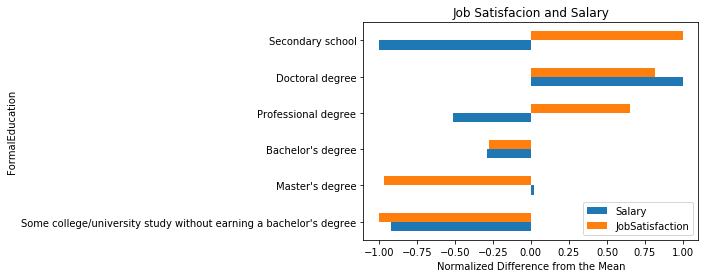

In [58]:
ax = female_education_salary.plot.barh(title='Job Satisfacion and Salary')
ax.set_xlabel("Normalized Difference from the Mean")

# U.S. Female developers' recommendation to break into the field

In [ ]:
title='How Do U.S. Female Developers Suggest You Break Into The Field?'
plt.title(title)

In [8]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [22]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='How Do U.S. Female Developers Suggest You Break Into The Field?', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'How to break into the field', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'How to break into the field', 'count', possible_vals)

    study_df.set_index('How to break into the field', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

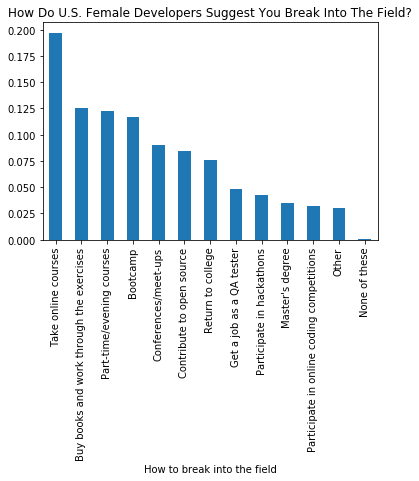

In [25]:
df_us_f = df[(df['Country'] == 'United States') & (df['Gender'] == 'Female')]
break_us_f = clean_and_plot(df_us_f)

# U.S. Female developer's recommendation vs. Males' 

In [26]:
df_us_m = df[(df['Country'] == 'United States') & (df['Gender'] == 'Male')]
break_us_f_df = clean_and_plot(df_us_f, 'U.S. Female', plot=False)
break_us_m_df = clean_and_plot(df_us_m, 'U.S. Male', plot=False)

comp_df = pd.merge(break_us_f_df, break_us_m_df, left_index=True, right_index=True)
comp_df.columns = ['U.S. Female', 'U.S. Male']
comp_df['Diff_Female_vs_male'] = comp_df['U.S. Female'] - comp_df['U.S. Male']
comp_df.style.bar(subset=['Diff_Female_vs_male'], align='mid', color=['#d65f5f', '#5fba7d'])

,U.S. Female,U.S. Male,Diff_Female_vs_male
How to break into the field,,,
Take online courses,0.197257,0.194247,0.003011
Buy books and work through the exercises,0.125000,0.164476,-0.039476
Part-time/evening courses,0.122890,0.095654,0.027236
Bootcamp,0.117089,0.076090,0.040998
Conferences/meet-ups,0.090190,0.075394,0.014796
Contribute to open source,0.084388,0.112976,-0.028587
Return to college,0.075422,0.078333,-0.002911
Get a job as a QA tester,0.047996,0.049335,-0.001339
Participate in hackathons,0.042194,0.036189,0.006005


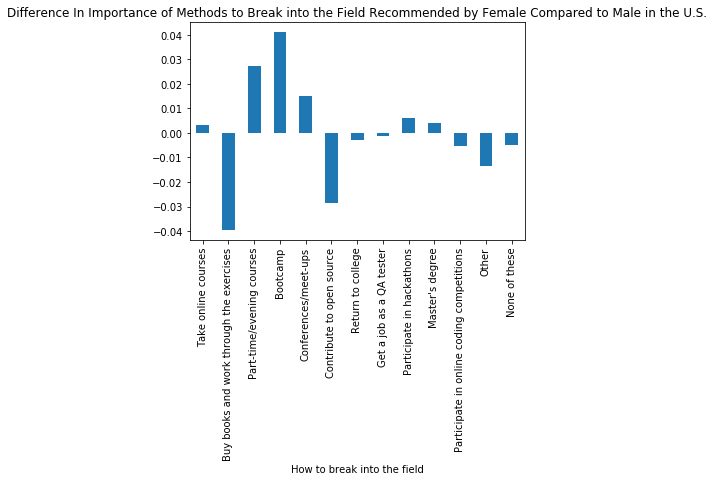

In [30]:
title='Difference In Importance of Methods to Break into the Field Recommended by Female Compared to Male in the U.S.'
(comp_df['Diff_Female_vs_male']).plot(kind='bar', legend=None);
plt.title(title);
plt.show()